In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Load the data

In [2]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [3]:
y.shape, tx.shape

((10000,), (10000, 2))

# 1 Computing the Cost Function

Fill in the `compute_loss` function below:
<a id='compute_loss'></a>


In [4]:
w = np.array([1, 2])

In [5]:
def compute_loss(y, tx, w):
    """Calculate the loss.

    You can calculate the loss using mse or mae.
    """
    # ***************************************************
    error = y - tx.dot(w.transpose())
    loss = len(y) * 0.5 * error.transpose().dot(error)
    return loss
    # ***************************************************
    raise NotImplementedError

In [6]:
compute_loss(y, tx, w)

269448336588.70837

# 2 Grid Search

Fill in the function `grid_search()` below:

In [7]:
def grid_search(y, tx, w0, w1):
    """Algorithm for grid search."""
    # ***************************************************
    grid = np.array(np.meshgrid(w0, w1)).T.reshape(-1, 2)
    losses = [compute_loss(y, tx, np.array(weights)) for weights in grid]
    losses = np.reshape(np.array(losses).T, (len(w0), len(w1)))
    return losses
    # ***************************************************
    raise NotImplementedError

Let us play with the grid search demo now!

Grid Search: loss*=4242448314.678249, w0*=66.66666666666669, w1*=16.666666666666686, execution time=0.011 seconds


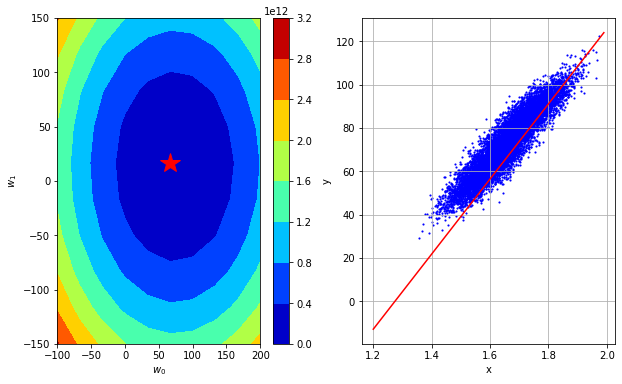

In [8]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=10)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

# 3 Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [16]:
def compute_gradient(y, tx, w):
    """Compute the gradient."""
    # ***************************************************
    error = y - tx.dot(w.transpose())
    gradient = -1 * (1/ len(y)) * (tx.T @ error)
    return gradient
    # ***************************************************
    raise NotImplementedError

In [17]:
wt1 = np.array([100, 20])
wt2 = np.array([50, 10])
print(compute_gradient(y, tx, wt1))
print(compute_gradient(y, tx, wt2))

(2,)
(10000, 2)
[26.706078    6.52028757]
(2,)
(10000, 2)
[-23.293922    -3.47971243]


Please fill in the functions `gradient_descent` below:

In [13]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        gradient = compute_gradient(y, tx, w)
        loss = compute_loss(y, tx, w)
        # ***************************************************
        # ***************************************************
        # INSERT YOUR CODE HERE
        w = w - (gamma * gradient)
        # ***************************************************
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): gradient={g} loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, g=gradient, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [14]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): gradient=[-73.293922   -13.47971243] loss=279223671275.9166, w0=51.30574540147352, w1=9.435798704492393
Gradient Descent(1/49): gradient=[-21.9881766   -4.04391373] loss=26530246210.896194, w0=66.69746902191565, w1=12.266538315840034
Gradient Descent(2/49): gradient=[-6.59645298 -1.21317412] loss=3787837955.04416, w0=71.31498610804833, w1=13.115760199244338
Gradient Descent(3/49): gradient=[-1.97893589 -0.36395224] loss=1741021212.01745, w0=72.70024123388814, w1=13.370526764265632
Gradient Descent(4/49): gradient=[-0.59368077 -0.10918567] loss=1556807705.1450453, w0=73.11581777164008, w1=13.446956733772023
Gradient Descent(5/49): gradient=[-0.17810423 -0.0327557 ] loss=1540228489.5265298, w0=73.24049073296567, w1=13.469885724623941
Gradient Descent(6/49): gradient=[-0.05343127 -0.00982671] loss=1538736360.1208632, w0=73.27789262136332, w1=13.476764421879517
Gradient Descent(7/49): gradient=[-0.01602938 -0.00294801] loss=1538602068.4743533, w0=73.28911318788263, 

In [15]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 4 Stochastic gradient descent

In [26]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient from just few examples n and their corresponding y_n labels."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    error = y - tx.dot(w.transpose())
    gradient = -1 * (1/ len(y)) * (tx.T @ error)
    return gradient
    # ***************************************************
    raise NotImplementedError

from helpers import batch_iter
    
def stochastic_gradient_descent(
        y, tx, initial_w, batch_size, max_iters, gamma):
    losses = []
    ws = []
    w = initial_w
    """Stochastic gradient descent algorithm."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    for n_iter in range(max_iters):
        for y_batch, tx_batch in batch_iter(y, tx, batch_size=batch_size, num_batches=1):
            gradient = compute_stoch_gradient(y_batch, tx_batch, w)
            w = w - gamma * gradient
            loss = compute_loss(y, tx, w)
            # store w and loss
            ws.append(w)
            losses.append(loss)

        print("SGD({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))
    # ***************************************************
    return losses, ws

In [27]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

SGD(0/49): loss=356868213027.4413, w0=33.01971351147938, w1=-60.578242001146826
SGD(1/49): loss=341829772309.49817, w0=14.931573892998607, w1=-44.82689091011909
SGD(2/49): loss=341835551023.572, w0=14.831554704763107, w1=-44.72759685451905
SGD(3/49): loss=795105240196.6068, w0=120.20580466416642, w1=130.40108898049286
SGD(4/49): loss=256792717720.268, w0=36.09682829414089, w1=74.48347296127642
SGD(5/49): loss=239213492052.8215, w0=49.79636519243984, w1=78.29763348538465
SGD(6/49): loss=232993944982.089, w0=39.29345266351514, w1=72.41251491934162
SGD(7/49): loss=222263672990.37665, w0=52.946154001785885, w1=76.72898137523097
SGD(8/49): loss=185234637065.25748, w0=125.30775127324803, w1=-17.64073952380957
SGD(9/49): loss=155286810425.51306, w0=106.65045382719174, w1=-30.81821322044754
SGD(10/49): loss=20489424678.66921, w0=62.985787332670164, w1=-3.0357069503162286
SGD(11/49): loss=5344596098.495655, w0=79.62149303781173, w1=7.47288373588818
SGD(12/49): loss=4657375597.134592, w0=70.4910

In [28]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 5 Effect of Outliers and MAE Cost Function, and Subgradient Descent

### Exercise 5

Load and plot data containing outliers

### Exercise 6

Modify the function `compute_loss(y, tx, w)` for the Mean Absolute Error cost function [here](#compute_loss)